# Convolutional Neural Networks for image classification 

In this assignment you will create your own Convolutional Neural Networks (CNN) model.  You should train the network so that it use at least 3 classes and  at most 10 classes where your dataset should have at least 1500 images per class.

> **Be aware:** Advanced neural networks are often trained on high performance (super) computers. our hardware is limited in memory and performance, and more suited for deployment of these kind of networks then for training. But this doesn't mean we can't train on it, we should only be aware that if we want better results and more complex networks you should consider more advanced hardware. 


There are several datasets available that are usable for image classification, one of them is the cifar10 dataset, which has 6000 images per class. The [Cifar10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset, classifies objects like cats, cars, airplanes, etc.

![](https://production-media.paperswithcode.com/datasets/4fdf2b82-2bc3-4f97-ba51-400322b228b1.png)
<!--
![](https://www.researchgate.net/profile/Robert-Kozma/publication/329109238/figure/fig2/AS:708896771551232@1546025569617/Examples-of-CIFAR-10-images-with-10-classes-10-examples-for-each-class_Q640.jpg)
-->


The [Cifar100](https://www.cs.toronto.edu/~kriz/cifar.html) dataset
is just like the CIFAR-10, except it has 100 classes containing 600 images each. There are 500 training images and 100 testing images per class. The 100 classes in the CIFAR-100 are grouped into 20 superclasses. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs).

Other wideley used datasets are https://www.image-net.org/ or https://cocodataset.org/


<ins>**You can use these datasets but are also allowed to find your own dataset or to even create your own custom dataset.**</ins>



Use the following website that takes you trought all the steps of development.
https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/

For this assignment: 

* You should use at least 3 classes and at most 10 classes where such dataset should have at least 1500 images per class. (more images should lead to better detection performance) 


<!--
* When you follow the steps on the given website you should be aware to downscale the suggested network to be able to train, you can actually train all the 10 classes on the given Cifar dataset on the jetson with a downscaled CNN!
--> 

* Show the output of the different (training) steps and the resulting classification and answer the related questions in the subsections below





 




# Initialization

load all needed libraries and functions, 
check the previous tutorial how to correctly load keras and other modules

In [11]:
import sys
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# Ref: https://www.tensorflow.org/guide/gpu#limiting_gpu_memory_growth
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=4096)]) # Notice here
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)


1 Physical GPUs, 1 Logical GPUs


# Load dataset & Plot a subset

load your dataset and show a plot of the subset of your data

> Just remember that you must use at least 3 classes and at most 10 classes, so, in the case of the cifar10, if you decide to use 5 classes, then get rid of the other 5 to save space. In other words, choose a dataset, check the images (amount, size in pixels) and implement the steps needed shown in the provided notebook. 

In [13]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [14]:
X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [15]:
X_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 1))

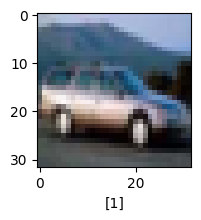

In [16]:
def plot_Sample(X, y, index):
    plt.figure(figsize = (10,2))
    plt.imshow(X[index])
    plt.xlabel(y[index])
    
plot_Sample(X_train, y_train, 4)

# Prepare Pixel Data

pre-process your raw input data... rescale... normalize....

Converting y_train and y_test to 1D numpy array instead of 2D array.
Should run init before because they will be the same after this cell e

In [17]:
print("Before reshaping")
print(y_train[:5])

y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

print("After reshaping")
print(y_train[:5])


Before reshaping
[[6]
 [9]
 [9]
 [4]
 [1]]
After reshaping
[6 9 9 4 1]


In [18]:
#y_train = tf.keras.utils.to_categorical(y_train)
#y_test = tf.keras.utils.to_categorical(y_test)

### Normalizing the training data

In [19]:
X_train = X_train / 255.0
X_test = X_test / 255.0

## Define your Model

This is the crucial part of the assignment! 

We do not expect that you can/should develop your own network model, so you can take the suggested model as decribed on [the given website](https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/).....but 


**NOTE:**

If you run into memory and processing limitations you can reduce the amount of convolutions and dense layers, you can reduce the amount of classes, you can reduce the amount of input images, or the input images size. With a scaled down network the accuracy will be lower then with a more complex network. 


* How is your model constructed, how many trainable parameters does it have, and where are they located?

In [20]:
ann = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(32,32,3)),
        tf.keras.layers.Dense(3000, activation='relu'),
        tf.keras.layers.Dense(1000, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8139 - accuracy: 0.3533
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6244 - accuracy: 0.4265
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5447 - accuracy: 0.4554
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4831 - accuracy: 0.4773
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4326 - accuracy: 0.4949


In [22]:
cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 2304)              0         
                                                                 
 dense_6 (Dense)             (None, 64)               

# Fit the Model

Fitting the model is the time consuming part, this depend on the complexity of the model and the amount of training data.
In the fitting process the model is first build up in memory with all the tunable parameters and intercomnnects (with random start values). This is also the limitation of some systems, all these parameters are stored in memory (or when not fitting in a swap file)

**TIP:** do not start the first time with training a lot of epochs, first see if this and all following steps in your system work and when you are sure that all works train your final model. 

* Which batch size and how many epochs give a good result?

In [ ]:
cnn.fit(X_train, y_train, epochs=3)

# Evaluate Model

Show the model accuracy after the training process ... 
* How accurate is your final model?

# learning curves

Show the learning curves of your training sequence, of accuracy, value_accuracy and loss, value_loss

* Explain what the difference is between the therms accuracy and value_accuracy? (what do they represent)

# Save model

Save the model for later usage

# Evaluate Final Model

After training and saving the model you can deploy this model on any given input image. You can start a new application in where you import this model and apply it on any given imput images, so you can just load the model and don't need the timeconsuming training anymore.

## Make Prediction

We can use our saved model to make a prediction on new images that are not trained on... make sure the input images receive the same pre-processing as the images you trained on.

So fetch some images from the internet (similar classes, but not from your dataset), prepare them to fit your network and classify them. Do this for  **10 images per class** and show the results!

* How good is the detection on you real dataset? (show some statistics) 